## Naive Bayes Deep Learning

  0%|          | 0/1000000 [00:00<?, ?it/s]

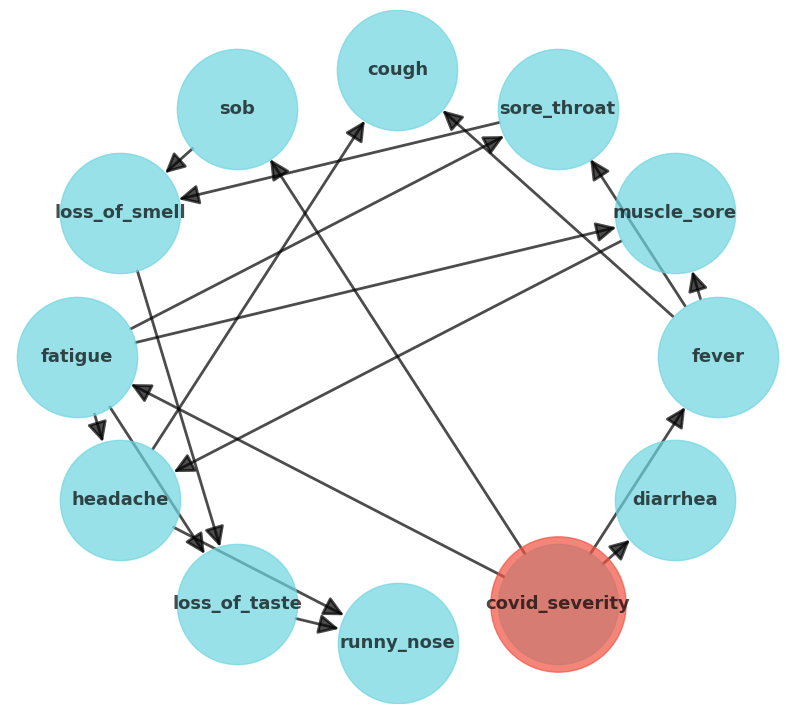

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from pgmpy.models import BayesianModel
from pgmpy.estimators import HillClimbSearch, BicScore

# Load your data
data = pd.read_csv("symptoms.csv")

# Use BIC as the scoring method
bic = BicScore(data)

# Use HillClimbSearch algorithm to learn the structure
hc = HillClimbSearch(data)

# Estimate the best model using BIC scoring
best_model_hc = hc.estimate(scoring_method=bic)

# Get the learned structure as edges for HillClimbSearch
learned_structure_hc = list(best_model_hc.edges())

# Visualize the Bayesian network structure for HillClimbSearch
fig, ax = plt.subplots(figsize=(10, 9))
G_bn_hc = nx.DiGraph()
G_bn_hc.add_edges_from(learned_structure_hc)
G_bn_hc.add_nodes_from(best_model_hc.nodes)
pos_bn_hc = nx.circular_layout(G_bn_hc)

nx.draw_networkx(
    G_bn_hc,
    pos=pos_bn_hc,
    with_labels=True,
    node_size=7500,
    arrowsize=30,
    alpha=0.7,
    font_weight="bold",
    font_size=13,
    node_color='#6ED5E0',
    width=2.0,
    ax=ax
)

# Customize circular for 'covid_severity' node
tt_g_hc = G_bn_hc.subgraph(nodes=['covid_severity'])
nx.draw(
    tt_g_hc,
    pos=pos_bn_hc,
    with_labels=False,
    arrowsize=0,
    node_size=9500,
    alpha=0.7,
    font_weight="bold",
    font_size=13,
    node_color='#F15241',
    ax=ax,
    width=2.0
)

# Save the figure as a PDF with a unique filename
filename_hc = 'deep_naive.pdf'
plt.savefig(filename_hc, bbox_inches='tight')
plt.show()
plt.close()
